# Data Wrangling

As the data to build the model is from 3rd party resource, exploration and cleaning is essential step. 
Meanwhile, the primary data is question sentance which a typical NLP data cleaning step should be followed to guarantee the data is generic.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

### Preliminary EDA

In [3]:
print('Training data set: ' + str(len(train_data)))
print('Test data set: ' + str(len(test_data)))


Training data set: 1306122
Test data set: 375806


The below indicate there is no null cell in all columns. Hence, don't need to fill or remove the record at this moment 

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375806 entries, 0 to 375805
Data columns (total 2 columns):
qid              375806 non-null object
question_text    375806 non-null object
dtypes: object(2)
memory usage: 5.7+ MB


In [6]:
print (train_data.question_text.describe())
print('\n')
print (test_data.question_text.describe())

count                                         1306122
unique                                        1306122
top       What are your thoughts on female supremacy?
freq                                                1
Name: question_text, dtype: object


count                                                375806
unique                                               375806
top       What is the difference between negotiable inst...
freq                                                      1
Name: question_text, dtype: object


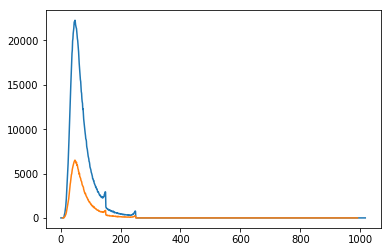

In [7]:
train_data['length'] = train_data['question_text'].str.len()
test_data['length'] = test_data['question_text'].str.len()

train_data['length'].value_counts().sort_index().plot(kind='line')
test_data['length'].value_counts().sort_index().plot(kind='line')
plt.show()

Below shows the ratio on target value: majority of questions are normal/valid question

0    1225312
1      80810
Name: target, dtype: int64


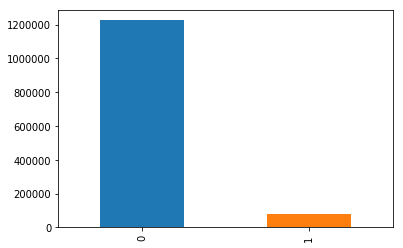

In [8]:
print(train_data['target'].value_counts())
train_data['target'].value_counts().plot(kind='bar')

Below shows the question text contains white space, special symbol & foreign characters. 
As the nlp has language specific settings and functions, the foreign characters & extra white space should be removed 
As for punchaction, some AI/ML models take the punchaction into account for semantic parsing. Some models, such as bag of words, does not using punchaction due to the natural of the algorithm is based on word frequency.    

In [9]:
sorted = train_data.sort_values('question_text')

In [10]:
sorted['question_text'].head(10)

840731          I want to blow things up with TNT now what?
613283     !TRIGGER WARNING! Am I a homophobe if I refuse...
420816                                                     "
1102919    " I post a download link of a website in my we...
213438     " I visited the theater" or "I enjoyed the the...
496717     " I've been to the doctor many times now to cu...
646127     " Is there anybody who had drastic good / bad ...
4692       " So far She has published three chapters of h...
998382     " What does the scientific mean when you dream...
387244     " if 25 men working 6 hrs a day, can do a work...
Name: question_text, dtype: object

In [11]:
sorted['question_text'].tail(10)

113435     ⁠⁠Is it bad to lay your motorcycle on its side...
146277                       −6.175 is an irrational number?
859955     ♣ Why does Winston finally give in to the ideo...
1185049    ⦁ What are the methods used to suppress or red...
415446     译文 who well be enter the next member of the st...
231111                                   한국 고등학교는 몇시간 수업하니까?
814877               what is the Complex compound sentence?
916459     ﻿What are the best porn pictures serving websi...
1261734    Ｈow do I find the negative solution of 4^x = x...
344918     ￼￼Assuming that a lightning bolt can be modell...
Name: question_text, dtype: object

### Data Wrangling for NLP 
A typical NLP pre-processed step contains the following: 
- Removing accented & foreign characters
    - The NLP is limited to one language in most of modeler, Therefore, it is helpful to remove characters tat is not english 
- Expanding Contractions
    - Frequently, contractions shows up in text taht generate variation for words. It will be helpful if we can remove them. The contractions can be removed via syntax rule.
- Expanding Abbreviation
    - Similar to tocontraction, abbreviaton generates word variation which incrase number of features int the training data. However, due to the large amount of abbreviation , possible ambiguity and has no aviable API, this will be skipped   
- Case Unification
    - This is to make all character to lower case such that the string comparsion cn recognize them
- Removing Special Characters
    - To remove non alphanumeric characters 
- Stemming
    - To remove word affixes to get to the base form of a word
- Lemmatization 
    - Also to remove word affixes to get to the base form of a word  [refrence on the difference between Stemming and Lemmatization](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python)
- Removing Stopwords
    - To remove english stop words


In [12]:
#control parameter for data wrangling steps
remove_accent = True
remove_non_ascii = True
remove_white_space = True
expand_contraction = True
case_unification = True
remove_special_character = True
stemming = False
lemmatization = True
remove_stopword = True

### Removing Accented & Foreign Characters

In [13]:
%%time

def remove_non_ascii(text):
    return ''.join(i for i in text if ord(i)<128)
def remove_white_space(text):
    return text.strip().strip('\t\n')

if remove_accent:
    train_data['question_text'] = train_data['question_text'].str.normalize('NFKD')
    test_data['question_text'] = test_data['question_text'].str.normalize('NFKD')

if remove_non_ascii:
    train_data['question_text'] = train_data['question_text'].apply(remove_non_ascii)
    test_data['question_text'] = test_data['question_text'].apply(remove_non_ascii)

if remove_white_space:
    train_data['question_text'] = train_data['question_text'].apply(remove_white_space)
    test_data['question_text'] = test_data['question_text'].apply(remove_white_space)


CPU times: user 17.3 s, sys: 138 ms, total: 17.5 s
Wall time: 17.5 s


### Expanding Contractions  : use [contractions](https://github.com/kootenpv/contractions), an altervative is [pycontractions](https://pypi.org/project/pycontractions/)

In [14]:
%%time

import contractions

if expand_contraction:
    train_data['question_text'] = train_data['question_text'].apply(contractions.fix)
    test_data['question_text'] = test_data['question_text'].apply(contractions.fix)


CPU times: user 2min 36s, sys: 291 ms, total: 2min 36s
Wall time: 2min 36s


### Case Unification

In [15]:
%%time

if case_unification:
    train_data['question_text'] = train_data['question_text'].str.lower()
    test_data['question_text'] = test_data['question_text'].str.lower()


CPU times: user 899 ms, sys: 42 ms, total: 941 ms
Wall time: 941 ms


### Removing Special Characters

In [16]:
%%time

import re

def remove_special_character(text):
    return re.sub('[^A-Za-z0-9\s]+', '', text)

if remove_special_character:
    train_data['question_text'] = train_data['question_text'].apply(remove_special_character)
    test_data['question_text'] = test_data['question_text'].apply(remove_special_character)


CPU times: user 5.63 s, sys: 26.5 ms, total: 5.65 s
Wall time: 5.66 s


### Porter Stemming

In [17]:
%%time

import nltk
#nltk.download('punkt')
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

def porter_stemmer(text): #PorterStemmer
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in word_tokenize(text)])
    return text

if stemming:
    train_data['question_text'] = train_data['question_text'].apply(porter_stemmer)
    test_data['question_text'] = test_data['question_text'].apply(porter_stemmer)


CPU times: user 735 ms, sys: 271 ms, total: 1.01 s
Wall time: 1.41 s


### WordNet Lemmatization

In [18]:
%%time

import nltk
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
#nltk.download()
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from nltk.corpus import  wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemmatizer(text): 
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)])
    return text

if lemmatization:
    train_data['question_text'] = train_data['question_text'].apply(lemmatizer)
    test_data['question_text'] = test_data['question_text'].apply(lemmatizer)
    


CPU times: user 44min 50s, sys: 4min, total: 48min 51s
Wall time: 48min 58s


### Removing Stopwords

In [19]:
%%time

import nltk
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))

stop_words.remove('not')
stop_words.remove('no')

def remove_stop_word(text): 
    text = ' '.join([w for w in nltk.word_tokenize(text) if w not in stop_words])
    return text

if remove_stopword:
    train_data['question_text'] = train_data['question_text'].apply(remove_stop_word)
    test_data['question_text'] = test_data['question_text'].apply(remove_stop_word)


CPU times: user 2min 49s, sys: 464 ms, total: 2min 49s
Wall time: 2min 50s


### Post EDA 

count    1.306122e+06
mean     4.307816e+01
std      2.523496e+01
min      0.000000e+00
25%      2.600000e+01
50%      3.700000e+01
75%      5.300000e+01
max      5.870000e+02
Name: length_a, dtype: float64
count    375806.000000
mean         43.142885
std          25.205177
min           0.000000
25%          26.000000
50%          37.000000
75%          53.000000
max         478.000000
Name: length_a, dtype: float64


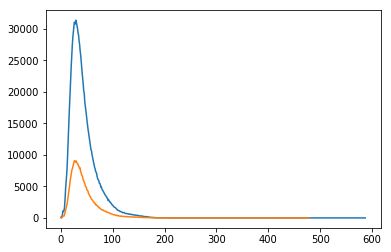

In [20]:
train_data['length_after'] = train_data['question_text'].str.len()
test_data['length_after'] = test_data['question_text'].str.len()

train_data['length_after'].value_counts().sort_index().plot(kind='line')
test_data['length_after'].value_counts().sort_index().plot(kind='line')

print(train_data['length_after'].describe())
print(test_data['length_after'].describe())

count    1.306122e+06
mean     6.516358e+00
std      3.733947e+00
min      0.000000e+00
25%      4.000000e+00
50%      6.000000e+00
75%      8.000000e+00
max      7.700000e+01
Name: word_count, dtype: float64
count    375806.000000
mean          6.523539
std           3.726495
min           0.000000
25%           4.000000
50%           6.000000
75%           8.000000
max          45.000000
Name: word_count, dtype: float64


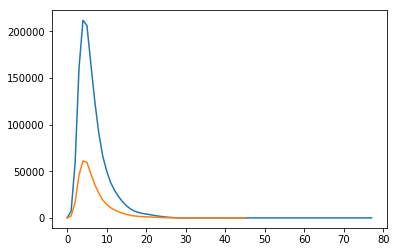

In [21]:
#train_data['word_count'] = train_data['question_text'].apply(lambda x: len(nltk.word_tokenize(x)))   tooo slow
train_data['word_count'] = train_data['question_text'].apply(lambda x: len(str(x).split()))
test_data['word_count'] = test_data['question_text'].apply(lambda x: len(str(x).split()))

train_data['word_count'].value_counts().sort_index().plot(kind='line')
test_data['word_count'].value_counts().sort_index().plot(kind='line')
print(train_data['word_count'].describe())
print(test_data['word_count'].describe())

1      735
2     5938
3    16103
4    21140
5    20568
6    16466
7    12595
8     9097
9     6615
Name: word_count, dtype: int64
1     205
2    1659
3    4558
4    6085
5    6008
6    4713
7    3588
8    2679
9    1942
Name: word_count, dtype: int64


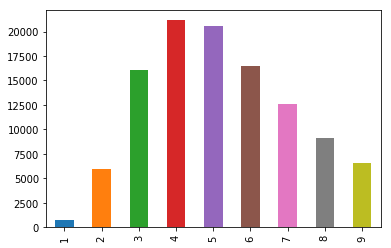

In [44]:
train_data.loc[(train_data.word_count < 10),'word_count'].value_counts().sort_index().plot(kind='bar')
test_data.loc[(test_data.word_count < 10),'word_count'].value_counts().sort_index().plot(kind='bar')
print(train_data.loc[(train_data.word_count < 10),'word_count'].value_counts().sort_index())
print(test_data.loc[(test_data.word_count < 10),'word_count'].value_counts().sort_index())

In [23]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

train_text = train_data['question_text']
test_text = test_data['question_text']
train_target = train_data['target']
all_text = train_text.append(test_text)

count_vectorizer = CountVectorizer()
count_vectorizer.fit(all_text)


bag_of_words = count_vectorizer.transform(all_text)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
word_check = pd.DataFrame(words_freq, columns=['word', 'count'])
sorted_word_check= word_check.sort_values('count', ascending=False)
print(sorted_word_check.head(30))
print(sorted_word_check.tail(30))

        word   count
11       not  134905
65       get  102421
8      would   81846
453     best   80252
10    people   73064
342     like   65812
156     make   60427
21       use   57468
105     good   50004
155      one   46321
337    india   42102
113    think   37712
287     year   37272
68       way   36043
107     take   35597
232     work   35148
15      time   35120
67        go   34620
98      know   34529
122     many   31454
137     life   30931
598     want   30828
336     much   30207
264  someone   29522
87      well   27153
33    become   26387
471  country   25622
562    start   25036
69      feel   24947
52     thing   24804
                              word  count
138200                    cockroch      1
138202                      altalt      1
138203           motivationrelated      1
138204                      modhol      1
138206                     arborio      1
138207              supertautology      1
138208                        leol      1
138210       

 ### Another baseline after data wrangling to compare with the initial baseline

In [24]:
import datetime, time, psutil, os
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
# remove records have no word after data wrangling
train_data = train_data.loc[(train_data.word_count > 0)]
test_data = test_data.loc[(test_data.word_count > 0)]
train_data= train_data.reset_index()
test_data = test_data.reset_index()

In [26]:
#  CONTROL PARAMTERS 
size = 0.1
tfTransform = True

train_data_full = train_data
test_data_full = test_data
train_data = train_data[: int(len(train_data) * size)]
test_data = test_data[:int(len(test_data) * size)]

In [27]:
train_text = train_data['question_text']
train_target = train_data['target']

test_text = test_data['question_text']

all_text = train_text.append(test_text)

In [28]:
%%time

count_vectorizer = CountVectorizer()
#count_vectorizer.fit(all_text)
#train_text_features_cv = count_vectorizer.transform(train_text)
#test_text_features_cv = count_vectorizer.transform(test_text)
train_text_features_cv = count_vectorizer.fit_transform(train_text)

In [29]:
%%time

tfidf_vectorizer = TfidfVectorizer()
#tfidf_vectorizer.fit(all_text)
#train_text_features_tf = tfidf_vectorizer.transform(train_text)
#test_text_features_tf = tfidf_vectorizer.transform(test_text)
train_text_features_tf = tfidf_vectorizer.fit_transform(train_text)

In [30]:
if tfTransform :
    train_text_features = train_text_features_tf
    #test_text_features = test_text_features_tf
else:
    train_text_features = train_text_features_cv
    #test_text_features = test_text_features_cv

print(train_text_features.shape)
print(train_target.shape)

(130602, 55941)
(130602,)


In [31]:
%%time

#BernoulliNB

kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)
test_preds = 0
oof_preds = np.zeros([train_data.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train_data)):
    x_train, x_valid = train_text_features[train_idx,:], train_text_features[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier = BernoulliNB()
    classifier.fit(x_train,y_train)   
    oof_preds[valid_idx] = classifier.predict_proba(x_valid)[:,1]

pred_train = (oof_preds > 0.25).astype(np.int)
accuracy = f1_score(train_target, pred_train)
print(accuracy)

0.3638004594683295
CPU times: user 1.37 s, sys: 51.6 ms, total: 1.42 s
Wall time: 368 ms


In [32]:
%%time

#LogisticRegression

kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)
test_preds = 0
oof_preds = np.zeros([train_data.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train_data)):
    x_train, x_valid = train_text_features[train_idx,:], train_text_features[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier = LogisticRegression(solver='liblinear')
    classifier.fit(x_train,y_train)
    oof_preds[valid_idx] = classifier.predict_proba(x_valid)[:,1]

pred_train = (oof_preds > 0.25).astype(np.int)
accuracy = f1_score(train_target, pred_train)
print(accuracy)

0.5157076611586441
CPU times: user 8.76 s, sys: 109 ms, total: 8.87 s
Wall time: 2.25 s


In [33]:
%%time

#GradientBoostingClassifier

kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)
test_preds = 0
oof_preds = np.zeros([train_data.shape[0],])

for i, (train_idx,valid_idx) in enumerate(kfold.split(train_data)):
    x_train, x_valid = train_text_features[train_idx,:], train_text_features[valid_idx,:]
    y_train, y_valid = train_target[train_idx], train_target[valid_idx]
    classifier = GradientBoostingClassifier(random_state=1)
    classifier.fit(x_train,y_train)
   
    oof_preds[valid_idx] = classifier.predict_proba(x_valid)[:,1]

pred_train = (oof_preds > 0.25).astype(np.int)
accuracy = f1_score(train_target, pred_train)
print(accuracy)

0.4322752985543683
CPU times: user 1h 8min 30s, sys: 9.47 s, total: 1h 8min 40s
Wall time: 1h 4min 8s


### Apply Both CountVector and TfIdfVector,  Accuracy Reporting Using Confusion Matrix
use classifier.predict instead of classifier.predict_proba in baseline for confusion matrix

In [34]:
from sklearn.model_selection import train_test_split
train_text = train_data['question_text']
test_text = test_data['question_text']
train_target = train_data['target']
all_text = train_text.append(test_text)
X_train, X_test, y_train, y_test = train_test_split(train_text, train_target, test_size=0.20, random_state = 0)

In [35]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# apply both cont vector & tf-idf vector 
count_vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()

# from X_train -> X_train_counts -> X_train_tfidf
X_train_count = count_vectorizer.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)

# fit model
classifier1 = BernoulliNB().fit(X_train_tfidf, y_train)
classifier2 = LogisticRegression(solver='liblinear').fit(X_train_tfidf,y_train)
classifier3 = GradientBoostingClassifier(random_state=1).fit(X_train_tfidf,y_train)

X_test_count = count_vectorizer.transform(X_test)
x_test_tfidf = tfidf_transformer.transform(X_test_count)

y_pred1 = classifier1.predict(x_test_tfidf)
y_pred2 = classifier2.predict(x_test_tfidf)
y_pred3 = classifier3.predict(x_test_tfidf)

CPU times: user 1min 23s, sys: 543 ms, total: 1min 24s
Wall time: 27.1 s


[[24203   205]
 [ 1339   374]]
[[24210   198]
 [ 1286   427]]
[[24320    88]
 [ 1472   241]]


              precision    recall  f1-score   support

           0       0.95      0.99      0.97     24408
           1       0.65      0.22      0.33      1713

   micro avg       0.94      0.94      0.94     26121
   macro avg       0.80      0.60      0.65     26121
weighted avg       0.93      0.94      0.93     26121

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     24408
           1       0.68      0.25      0.37      1713

   micro avg       0.94      0.94      0.94     26121
   macro avg       0.82      0.62      0.67     26121
weighted avg       0.93      0.94      0.93     26121

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     24408
           1       0.73      0.14      0.24      1713

   micro avg       0.94      0.94      0.94     26121
   macro avg       0.84      0.57

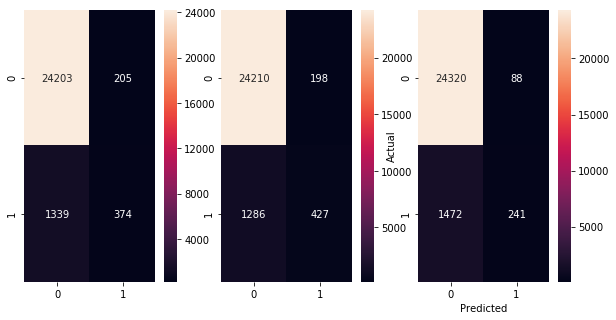

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat1 = confusion_matrix(y_test, y_pred1)
conf_mat2 = confusion_matrix(y_test, y_pred2)
conf_mat3 = confusion_matrix(y_test, y_pred3)

print(conf_mat1)  
print(conf_mat2)  
print(conf_mat3)  
print('\n')
print(classification_report(y_test,y_pred1))  
print(classification_report(y_test,y_pred2))  
print(classification_report(y_test,y_pred3))  
print('\n')
print(accuracy_score(y_test, y_pred1))  
print(accuracy_score(y_test, y_pred2))  
print(accuracy_score(y_test, y_pred3))  
print('\n')

fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharex=True)
sns.heatmap(conf_mat1, annot=True, fmt='d', ax=axes[0])
sns.heatmap(conf_mat2, annot=True, fmt='d', ax=axes[1])
sns.heatmap(conf_mat3, annot=True, fmt='d', ax=axes[2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Data Pipeline  [ref 1](https://www.kaggle.com/dilip990/spam-ham-detection-using-naive-bayes-classifier) [ref2](https://gist.github.com/amberjrivera/8c5c145516f5a2e894681e16a8095b5c) [ref 3](http://carrefax.com/articles-blog/2018/3/11/using-scikit-learn-to-classify-your-own-text-data-the-short-version)

In [37]:
from nltk.corpus import stopwords
import string

def text_process(text):
    nopunc =[char for char in text if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [38]:
%%time

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

train_text = train_data_full['question_text']
train_target = train_data_full['target']

from sklearn.pipeline import Pipeline
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression(solver='liblinear')),
])

X_train, X_test, y_train, y_test = train_test_split(train_text, train_target, test_size=0.25, random_state = 0)

CPU times: user 322 ms, sys: 254 ms, total: 576 ms
Wall time: 642 ms


In [39]:
%%time

#for data check
bow_transformer = CountVectorizer(analyzer=text_process).fit(train_text)
print(len(bow_transformer.vocabulary_))

225499
CPU times: user 17min 7s, sys: 3min 27s, total: 20min 34s
Wall time: 20min 37s


In [40]:
%%time

pipeline.fit(X_train,y_train)

CPU times: user 13min 15s, sys: 2min 34s, total: 15min 50s
Wall time: 15min 31s


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x11fb7d6a8>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...ty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

In [41]:
predictions = pipeline.predict(X_test)

[[302824   3609]
 [ 12669   7403]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.97    306433
           1       0.67      0.37      0.48     20072

   micro avg       0.95      0.95      0.95    326505
   macro avg       0.82      0.68      0.73    326505
weighted avg       0.94      0.95      0.94    326505



0.9501447144760418




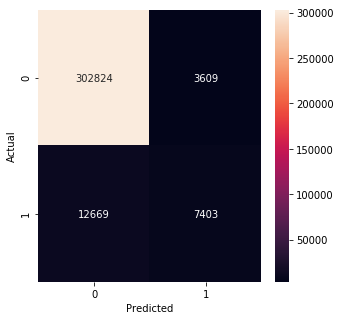

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_train = confusion_matrix(y_test,predictions)
print(conf_train)
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(accuracy_score(y_test, predictions))  
print('\n')

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_train, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

[[1212156   13065]
 [  49738   31061]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.97    306433
           1       0.67      0.37      0.48     20072

   micro avg       0.95      0.95      0.95    326505
   macro avg       0.82      0.68      0.73    326505
weighted avg       0.94      0.95      0.94    326505



0.9501447144760418




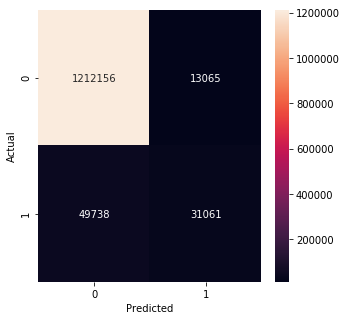

CPU times: user 35min 14s, sys: 6min 53s, total: 42min 7s
Wall time: 41min 35s


In [43]:
%%time

# for data check 
pipeline.fit(train_text,train_target)
all_predictions =  pipeline.predict(train_text)


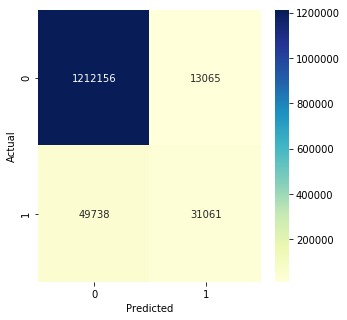

In [45]:
conf_all = confusion_matrix(train_target,all_predictions)

print(conf_all)
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(accuracy_score(y_test, predictions))  
print('\n')

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_all, annot=True, fmt='d', cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()